In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [74]:
raw = pd.read_csv("PLS_FY2014_AE_pupld14a1.csv")

## Original Data

In [75]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9301 entries, 0 to 9300
Columns: 161 entries, STABR to YR_SUB
dtypes: float64(10), int64(63), object(88)
memory usage: 11.4+ MB


In [76]:
#variables to use in the model
to_use = ['TOTCIR', 'POPU_LSA', 'STINCOME', 'STGVT', 'GEOCODE', 'OBEREG', 'LOCALE']
to_use_df = raw[to_use]
to_use_df.head()

,TOTCIR,POPU_LSA,STINCOME,STGVT,GEOCODE,OBEREG,LOCALE
0,11607,2059,71829,18993,CI1,8,43
1,1886620,300549,71829,56724,MA1,8,11
2,1092,209,71829,6300,CI1,8,43
3,12347,6241,71829,6600,CI1,8,33
4,59630,12793,71829,6600,CO1,8,42


In [77]:
to_use_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9301 entries, 0 to 9300
Data columns (total 7 columns):
TOTCIR      9301 non-null int64
POPU_LSA    9301 non-null int64
STINCOME    9301 non-null int64
STGVT       9301 non-null int64
GEOCODE     9301 non-null object
OBEREG      9301 non-null int64
LOCALE      9301 non-null object
dtypes: int64(5), object(2)
memory usage: 508.7+ KB


In [78]:
to_use_df.describe()
# -3 and -1 are missing

,TOTCIR,POPU_LSA,STINCOME,STGVT,OBEREG
count,9.301000e+03,9.301000e+03,9301.000000,9.301000e+03,9301.000000
mean,2.488169e+05,3.431926e+04,54220.708096,9.140132e+04,3.724116
std,1.028185e+06,1.366025e+05,7976.629792,8.204179e+05,1.975933
min,-3.000000e+00,-3.000000e+00,19686.000000,-3.000000e+00,1.000000
25%,1.147500e+04,2.189000e+03,48849.000000,2.150000e+02,2.000000
50%,4.107100e+04,7.281000e+03,52716.000000,4.052000e+03,3.000000
75%,1.434180e+05,2.278700e+04,58687.000000,2.142900e+04,5.000000
max,2.410174e+07,4.008651e+06,74149.000000,3.561788e+07,9.000000


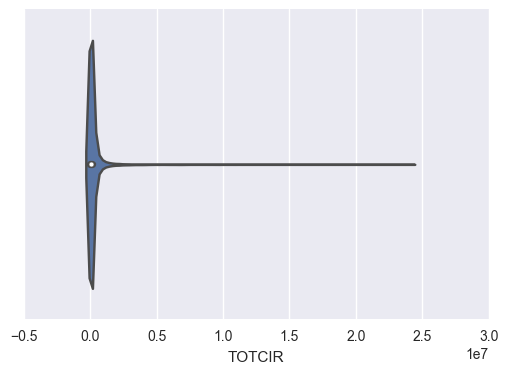

In [79]:
sns.violinplot(to_use_df['TOTCIR'])

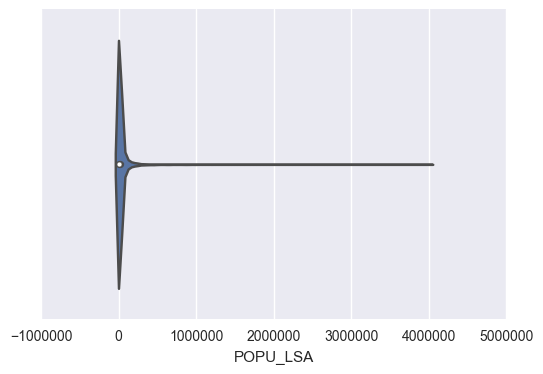

In [80]:
sns.violinplot(to_use_df['POPU_LSA'])

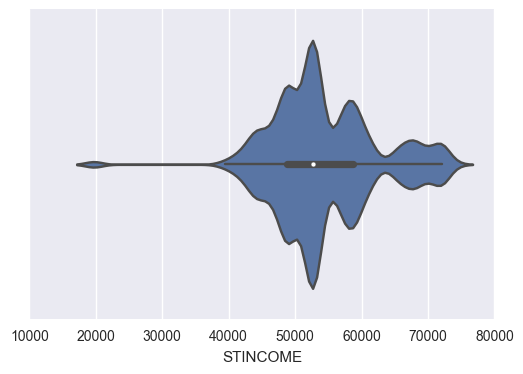

In [81]:
sns.violinplot(to_use_df['STINCOME'])

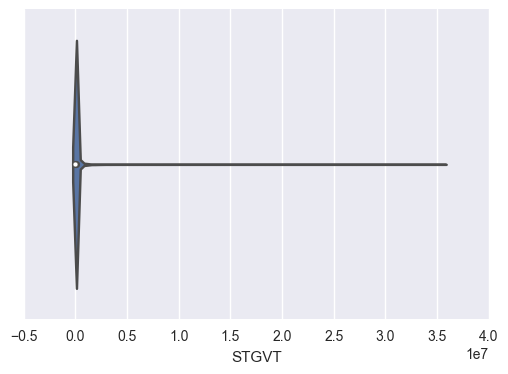

In [82]:
sns.violinplot(to_use_df['STGVT'])

In [83]:
to_use_df['GEOCODE'].value_counts()

CI1    3356
OTH    2148
CI2    1494
CO1    1129
CO2     508
SD1     423
MC1     129
SD2      52
MC2      41
MA1      11
MA2      10
Name: GEOCODE, dtype: int64

In [84]:
to_use_df['OBEREG'].value_counts()

3    1883
4    1620
2    1553
1    1288
5    1162
6     859
8     483
7     395
9      58
Name: OBEREG, dtype: int64

In [85]:
to_use_df['LOCALE'].value_counts()
#period is missing

42    2041
21    1881
43    1613
32    1057
33     643
41     505
31     502
13     296
22     258
23     206
12     117
.      106
11      76
Name: LOCALE, dtype: int64

In [86]:
to_use_df.corr()

,TOTCIR,POPU_LSA,STINCOME,STGVT,OBEREG
TOTCIR,1.000000,0.792648,0.028471,0.518032,0.097726
POPU_LSA,0.792648,1.000000,-0.002005,0.426403,0.129824
STINCOME,0.028471,-0.002005,1.000000,-0.012486,-0.398696
STGVT,0.518032,0.426403,-0.012486,1.000000,-0.011884
OBEREG,0.097726,0.129824,-0.398696,-0.011884,1.000000


## Missing Data

In [87]:
temp_median = to_use_df['TOTCIR'].median()
to_use_df['TOTCIR'] = to_use_df['TOTCIR'].replace(to_replace=-3.0, value=temp_median)
to_use_df['TOTCIR'] = to_use_df['TOTCIR'].replace(to_replace=-1.0, value=temp_median)

C:\Users\Molly\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\Molly\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [88]:
temp_median = to_use_df['POPU_LSA'].median()
to_use_df['POPU_LSA'] = to_use_df['POPU_LSA'].replace(to_replace=-3.0, value=temp_median)
to_use_df['POPU_LSA'] = to_use_df['POPU_LSA'].replace(to_replace=-1.0, value=temp_median)

C:\Users\Molly\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\Molly\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [89]:
temp_median = to_use_df['STGVT'].median()
to_use_df['STGVT'] = to_use_df['STGVT'].replace(to_replace=-3.0, value=temp_median)
to_use_df['STGVT'] = to_use_df['STGVT'].replace(to_replace=-1.0, value=temp_median)

C:\Users\Molly\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\Molly\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [90]:
to_use_df.describe()

,TOTCIR,POPU_LSA,STINCOME,STGVT,OBEREG
count,9.301000e+03,9.301000e+03,9301.000000,9.301000e+03,9301.000000
mean,2.490554e+05,3.432709e+04,54220.708096,9.142703e+04,3.724116
std,1.028132e+06,1.366007e+05,7976.629792,8.204151e+05,1.975933
min,0.000000e+00,1.000000e+01,19686.000000,0.000000e+00,1.000000
25%,1.191000e+04,2.195000e+03,48849.000000,3.250000e+02,2.000000
50%,4.107100e+04,7.281000e+03,52716.000000,4.052000e+03,3.000000
75%,1.434180e+05,2.278700e+04,58687.000000,2.142900e+04,5.000000
max,2.410174e+07,4.008651e+06,74149.000000,3.561788e+07,9.000000


In [91]:
temp_mode = to_use_df['LOCALE'].mode()
print temp_mode

0    42
dtype: object


In [92]:
to_use_df['LOCALE'] = to_use_df['LOCALE'].replace(to_replace='.', value=42).astype(int)

C:\Users\Molly\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [93]:
to_use_df['LOCALE'].value_counts()

42    2147
21    1881
43    1613
32    1057
33     643
41     505
31     502
13     296
22     258
23     206
12     117
11      76
Name: LOCALE, dtype: int64

## Transform continuous variables

In [94]:
log_columns = ['TOTCIR', 'POPU_LSA', 'STGVT']
log_df = to_use_df.copy()
log_df[log_columns] = log_df[log_columns].add(1)
log_df[log_columns] = log_df[log_columns].apply(np.log10)

In [95]:
log_df.head()

,TOTCIR,POPU_LSA,STINCOME,STGVT,GEOCODE,OBEREG,LOCALE
0,4.064757,3.313867,71829,4.278616,CI1,8,43
1,6.275685,5.477917,71829,4.753775,MA1,8,11
2,3.038620,2.322219,71829,3.799409,CI1,8,43
3,4.091597,3.795324,71829,3.819610,CI1,8,33
4,4.775472,4.107006,71829,3.819610,CO1,8,42


In [96]:
log_df.describe()

,TOTCIR,POPU_LSA,STINCOME,STGVT,OBEREG,LOCALE
count,9301.000000,9301.000000,9301.000000,9301.000000,9301.000000,9301.000000
mean,4.617195,3.869640,54220.708096,3.085505,3.724116,32.990646
std,0.814615,0.728793,7976.629792,1.861611,1.975933,9.837614
min,0.000000,1.041393,19686.000000,0.000000,1.000000,11.000000
25%,4.075948,3.341632,48849.000000,2.513218,2.000000,21.000000
50%,4.613546,3.862251,52716.000000,3.607777,3.000000,33.000000
75%,5.156607,4.357706,58687.000000,4.331022,5.000000,42.000000
max,7.382049,6.602998,74149.000000,7.551668,9.000000,43.000000


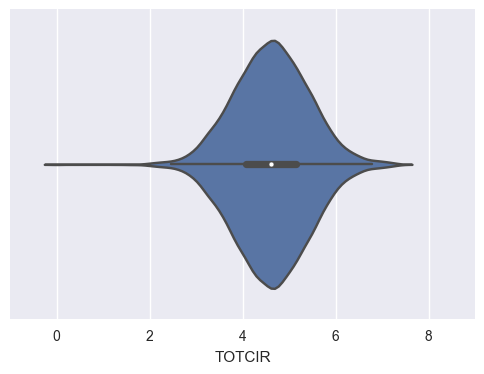

In [97]:
sns.violinplot(log_df['TOTCIR'])

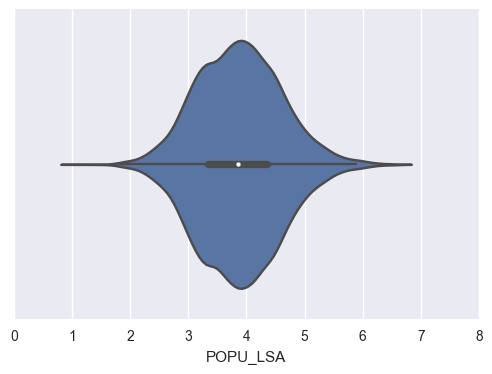

In [98]:
sns.violinplot(log_df['POPU_LSA'])

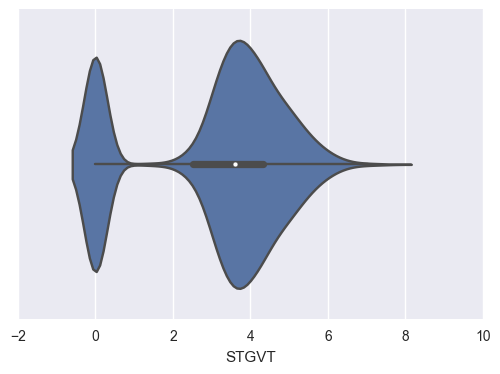

In [99]:
sns.violinplot(log_df['STGVT'])

## Get Dummy Variables

In [100]:
dummy_df = pd.get_dummies(log_df, columns=['GEOCODE', 'OBEREG', 'LOCALE'], drop_first=True)

In [101]:
dummy_df.head()

,TOTCIR,POPU_LSA,STINCOME,STGVT,GEOCODE_CI2,GEOCODE_CO1,GEOCODE_CO2,GEOCODE_MA1,GEOCODE_MA2,GEOCODE_MC1,...,LOCALE_13,LOCALE_21,LOCALE_22,LOCALE_23,LOCALE_31,LOCALE_32,LOCALE_33,LOCALE_41,LOCALE_42,LOCALE_43
0,4.064757,3.313867,71829,4.278616,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,6.275685,5.477917,71829,4.753775,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.038620,2.322219,71829,3.799409,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4.091597,3.795324,71829,3.819610,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,4.775472,4.107006,71829,3.819610,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [102]:
#correlation matrix
dummy_df.corr()

,TOTCIR,POPU_LSA,STINCOME,STGVT,GEOCODE_CI2,GEOCODE_CO1,GEOCODE_CO2,GEOCODE_MA1,GEOCODE_MA2,GEOCODE_MC1,...,LOCALE_13,LOCALE_21,LOCALE_22,LOCALE_23,LOCALE_31,LOCALE_32,LOCALE_33,LOCALE_41,LOCALE_42,LOCALE_43
TOTCIR,1.000000,0.860231,0.083326,0.378904,-0.136142,0.211229,0.045055,0.032746,0.024489,0.103632,...,0.216181,0.358447,0.096348,0.035255,0.053037,0.076277,0.044125,-0.051190,-0.315383,-0.383669
POPU_LSA,0.860231,1.000000,-0.030646,0.339485,-0.182581,0.289697,0.129652,0.033928,0.037839,0.167239,...,0.228763,0.336176,0.104695,0.052410,0.052261,0.102911,0.058008,-0.052013,-0.308364,-0.429240
STINCOME,0.083326,-0.030646,1.000000,-0.002183,-0.133220,-0.190443,-0.100826,-0.016906,-0.034960,-0.084369,...,-0.022107,0.252591,0.040801,-0.013233,-0.011471,-0.116226,-0.091256,0.085839,-0.061700,-0.084534
STGVT,0.378904,0.339485,-0.002183,1.000000,-0.258742,0.121421,-0.118843,-0.004967,0.001061,0.139640,...,0.066992,0.211943,-0.010277,0.016557,0.018387,0.027051,-0.029753,-0.027270,-0.116269,-0.154619
GEOCODE_CI2,-0.136142,-0.182581,-0.133220,-0.258742,1.000000,-0.162598,-0.105147,-0.015053,-0.014352,-0.051880,...,-0.009251,-0.140067,-0.020401,-0.008136,-0.011190,-0.003491,0.000827,-0.028579,0.111970,0.082679
GEOCODE_CO1,0.211229,0.289697,-0.190443,0.121421,-0.162598,1.000000,-0.089340,-0.012790,-0.012194,-0.044080,...,0.026389,-0.100262,0.001369,-0.024620,-0.030502,0.105491,0.111544,-0.058550,-0.047358,0.030614
GEOCODE_CO2,0.045055,0.129652,-0.100826,-0.118843,-0.105147,-0.089340,1.000000,-0.008271,-0.007886,-0.028505,...,-0.000450,-0.051520,0.034310,0.008837,0.030533,0.040653,0.012834,-0.011655,-0.033984,0.006125
GEOCODE_MA1,0.032746,0.033928,-0.016906,-0.004967,-0.015053,-0.012790,-0.008271,1.000000,-0.001129,-0.004081,...,0.011583,0.006039,-0.005812,0.016078,-0.008219,0.007392,-0.009377,0.005560,-0.018851,-0.007499
GEOCODE_MA2,0.024489,0.037839,-0.034960,0.001061,-0.014352,-0.012194,-0.007886,-0.001129,1.000000,-0.003891,...,0.031432,0.007985,-0.005541,-0.004937,0.006683,-0.001410,-0.008941,-0.007861,-0.010187,-0.015027
GEOCODE_MC1,0.103632,0.167239,-0.084369,0.139640,-0.051880,-0.044080,-0.028505,-0.004081,-0.003891,1.000000,...,-0.000552,-0.048267,0.002361,-0.017848,-0.020190,0.035745,0.029289,-0.024359,0.024485,-0.000902


## Linear Regression

In [103]:
X = dummy_df.drop(['TOTCIR'], axis=1)
y = dummy_df['TOTCIR']

In [104]:
import statsmodels.formula.api as smf

# statsmodel linear regression

lin_model = smf.OLS(endog=y, exog=X)
result = lin_model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 TOTCIR   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 4.501e+04
Date:                Thu, 30 Mar 2017   Prob (F-statistic):               0.00
Time:                        01:24:43   Log-Likelihood:                -4072.7
No. Observations:                9301   AIC:                             8209.
Df Residuals:                    9269   BIC:                             8438.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
POPU_LSA        0.9531      0.008    126.496      0.000         0.938     0.968
STINCOME      1.06e-05   6.12e-07     17.338      0.000       9.4e-06  1.18e-05
STGVT           0.0316      0.003     11.669      0.000         0.026     0.037
GEOCODE_CI2     0.1004      0.013      7.926      0.000         0.076     0.125
GEOCODE_CO1    -0.0233      0.016     -1.491      0.136        -0.054     0.007
GEOCODE_CO2    -0.1329      0.020     -6.798      0.000        -0.171    -0.095
GEOCODE_MA1     0.2500      0.114      2.193      0.028         0.026     0.473
GEOCODE_MA2    -0.0101      0.120     -0.085      0.932        -0.245     0.224
GEOCODE_MC1    -0.1959      0.037     -5.353      0.000        -0.268    -0.124
GEOCODE_MC2    -0.1134      0.060     -1.892      0.059        -0.231     0.004
GEOCODE_OTH     0.0483      0.012      3.912      0.000         0.024     0.072
GEOCODE_SD1     0.1503      0.021      7.211      0.000         0.109     0.191
GEOCODE_SD2    -0.0187      0.053     -0.353      0.724        -0.122     0.085
OBEREG_2       -0.0254      0.016     -1.602      0.109        -0.056     0.006
OBEREG_3        0.1961      0.015     12.660      0.000         0.166     0.226
OBEREG_4        0.2050      0.016     12.915      0.000         0.174     0.236
OBEREG_5        0.0352      0.020      1.722      0.085        -0.005     0.075
OBEREG_6        0.0588      0.019      3.123      0.002         0.022     0.096
OBEREG_7        0.2655      0.023     11.400      0.000         0.220     0.311
OBEREG_8        0.1726      0.021      8.279      0.000         0.132     0.213
OBEREG_9       -0.6869      0.057    -11.979      0.000        -0.799    -0.575
LOCALE_12       0.2100      0.050      4.208      0.000         0.112     0.308
LOCALE_13       0.2489      0.041      6.109      0.000         0.169     0.329
LOCALE_21       0.2301      0.036      6.435      0.000         0.160     0.300
LOCALE_22       0.2233      0.041      5.420      0.000         0.143     0.304
LOCALE_23       0.1279      0.042      3.025      0.002         0.045     0.211
LOCALE_31       0.1680      0.037      4.510      0.000         0.095     0.241
LOCALE_32       0.1360      0.035      3.902      0.000         0.068     0.204
LOCALE_33       0.1346      0.036      3.756      0.000         0.064     0.205
LOCALE_41       0.1320      0.037      3.551      0.000         0.059     0.205
LOCALE_42       0.0638      0.033      1.913      0.056        -0.002     0.129
LOCALE_43       0.0878      0.033      2.623      0.009         0.022     0.153
==============================================================================
Omnibus:                     3134.311   Durbin-Watson:                   1.768
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30155.655
Skew:                          -1.336   Prob(J

In [105]:
from sklearn.cross_validation import train_test_split
dummy_df = dummy_df.astype(float)
X, y = dummy_df.drop(['TOTCIR'], axis=1).values, dummy_df.loc[:, 'TOTCIR'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [106]:
#sklearn linear regression
from sklearn import linear_model, metrics

lm=linear_model.LinearRegression().fit(X_train, y_train)
print lm.score(X_train, y_train)

0.788856026775


In [107]:
lm = linear_model.LinearRegression().fit(X_train, y_train)
print 'Train OLS MSE: ', metrics.mean_squared_error(y_train, lm.predict(X_train))
print 'Test OLS MSE:', metrics.mean_squared_error(y_test, lm.predict(X_test))

lm = linear_model.Lasso().fit(X_train, y_train)
print 'Train Lasso MSE: ', metrics.mean_squared_error(y_train, lm.predict(X_train))
print 'Test Lasso MSE:', metrics.mean_squared_error(y_test, lm.predict(X_test))

lm = linear_model.Ridge().fit(X_train, y_train)
print 'Train Ridge MSE: ', metrics.mean_squared_error(y_train, lm.predict(X_train))
print 'Test Ridge MSE:', metrics.mean_squared_error(y_test, lm.predict(X_test))

Train OLS MSE:  0.141481200303
Test OLS MSE: 0.131884542035
Train Lasso MSE:  0.665922248821
Test Lasso MSE: 0.631102398057
Train Ridge MSE:  0.141488576519
Test Ridge MSE: 0.131756811107


In [108]:
from sklearn import grid_search

alphas = np.logspace(-10, 10, 21)
gs = grid_search.GridSearchCV(
    cv=5,
    estimator=linear_model.Ridge(),
    param_grid={'alpha': alphas, 'fit_intercept': [True, False]},
    scoring='mean_squared_error')

result = gs.fit(X_train, y_train)

In [109]:
from pprint import pprint
pprint(gs.grid_scores_ )

[mean: -0.14293, std: 0.01448, params: {'alpha': 1e-10, 'fit_intercept': True},
 mean: -0.14403, std: 0.01440, params: {'alpha': 1e-10, 'fit_intercept': False},
 mean: -0.14293, std: 0.01448, params: {'alpha': 1.0000000000000001e-09, 'fit_intercept': True},
 mean: -0.14403, std: 0.01440, params: {'alpha': 1.0000000000000001e-09, 'fit_intercept': False},
 mean: -0.14293, std: 0.01448, params: {'alpha': 1e-08, 'fit_intercept': True},
 mean: -0.14403, std: 0.01440, params: {'alpha': 1e-08, 'fit_intercept': False},
 mean: -0.14293, std: 0.01448, params: {'alpha': 9.9999999999999995e-08, 'fit_intercept': True},
 mean: -0.14403, std: 0.01440, params: {'alpha': 9.9999999999999995e-08, 'fit_intercept': False},
 mean: -0.14293, std: 0.01448, params: {'alpha': 9.9999999999999995e-07, 'fit_intercept': True},
 mean: -0.14403, std: 0.01440, params: {'alpha': 9.9999999999999995e-07, 'fit_intercept': False},
 mean: -0.14293, std: 0.01448, params: {'alpha': 1.0000000000000001e-05, 'fit_intercept': Tru

In [110]:
print gs.best_score_
print gs.best_estimator_
lrbestmodel=gs.best_estimator_

-0.142899713033
Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)


In [111]:
print lrbestmodel.coef_

[  9.03830590e-01   6.82179517e-06   3.32679475e-02   8.81638608e-02
   3.06592090e-03  -1.00817824e-01   2.13546324e-01  -7.60678790e-03
  -1.54631896e-01  -3.82358069e-02   4.54730804e-02   1.42564993e-01
  -5.09424751e-02  -4.78590664e-02   1.59066331e-01   1.57649471e-01
  -2.49493105e-02   1.94425563e-02   2.20202625e-01   1.68542560e-01
  -9.21964115e-01   5.40058636e-03   2.22296832e-02  -1.88649734e-02
  -3.05356798e-02  -1.30183148e-01  -1.09949892e-01  -1.39517232e-01
  -1.34524699e-01  -1.58400695e-01  -2.38499775e-01  -2.21394071e-01]


In [112]:
prediction = lrbestmodel.predict(X_test)

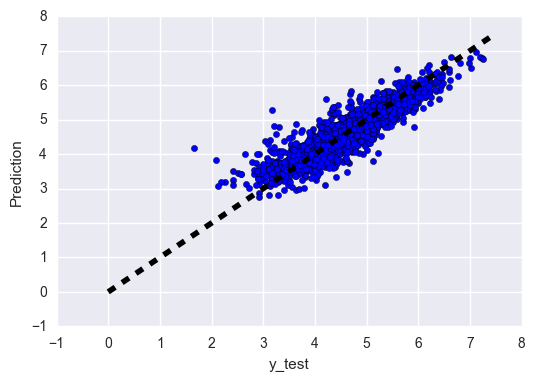

In [113]:
fig, ax = plt.subplots()
ax.scatter(y_test, prediction)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('y_test')
ax.set_ylabel('Prediction')
plt.show()

Prediction: DescribeResult(nobs=1861L, minmax=(2.7621259606902622, 6.9677918299283563), mean=4.6294365713529446, variance=0.51474924349805029, skewness=0.1741817004652936, kurtosis=-0.30049203124321977)
y_test: DescribeResult(nobs=1861L, minmax=(1.6627578316815741, 7.2612422363398883), mean=4.6361100710652536, variance=0.63725962483429255, skewness=-0.019595124169749786, kurtosis=0.058401921786591426)


0.79269931546685979

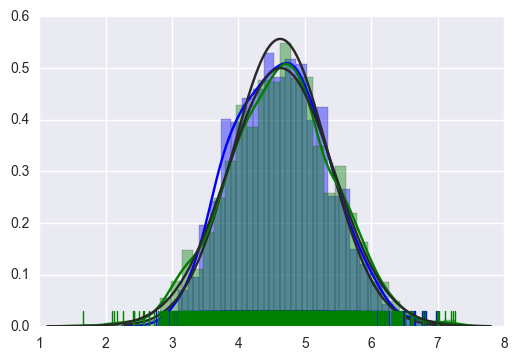

In [114]:
from scipy.stats import norm, normaltest, describe
sns.distplot(prediction, fit=norm, rug=True, color='b');
sns.distplot(y_test, fit=norm, rug=True, color='g');
print "Prediction:", describe(prediction)
stat, p = normaltest(prediction)
p

print "y_test:", describe(y_test)
stat, p = normaltest(y_test)
p

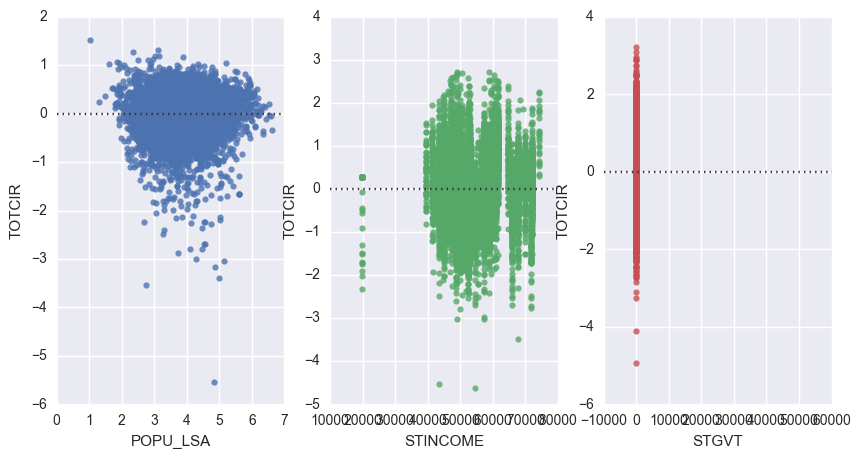

In [115]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))
for i, col in enumerate(['POPU_LSA', 'STINCOME', 'STGVT']):
    sns.residplot(y='TOTCIR', x=col, data=dummy_df, ax=axes[i])

## Random Forest

In [116]:
from sklearn.ensemble import RandomForestRegressor

maxdepth = np.arange(2, 75, 5)
minsamples = np.arange(10, 50, 10)
randomforest_gs = grid_search.GridSearchCV(
    cv=5,
    estimator=RandomForestRegressor(),
    param_grid={'max_depth': maxdepth, 'min_samples_split': minsamples},
    scoring='mean_squared_error')

randomforest_gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'min_samples_split': array([10, 20, 30, 40]), 'max_depth': array([ 2,  7, 12, 17, 22, 27, 32, 37, 42, 47, 52, 57, 62, 67, 72])},
       pre_dispatch='2*n_jobs', refit=True, scoring='mean_squared_error',
       verbose=0)

In [117]:
pprint(randomforest_gs.grid_scores_ )

[mean: -0.21375, std: 0.01665, params: {'min_samples_split': 10, 'max_depth': 2},
 mean: -0.21216, std: 0.02017, params: {'min_samples_split': 20, 'max_depth': 2},
 mean: -0.21511, std: 0.01848, params: {'min_samples_split': 30, 'max_depth': 2},
 mean: -0.21333, std: 0.02058, params: {'min_samples_split': 40, 'max_depth': 2},
 mean: -0.14778, std: 0.01429, params: {'min_samples_split': 10, 'max_depth': 7},
 mean: -0.14614, std: 0.01447, params: {'min_samples_split': 20, 'max_depth': 7},
 mean: -0.14598, std: 0.01450, params: {'min_samples_split': 30, 'max_depth': 7},
 mean: -0.14529, std: 0.01319, params: {'min_samples_split': 40, 'max_depth': 7},
 mean: -0.14209, std: 0.01351, params: {'min_samples_split': 10, 'max_depth': 12},
 mean: -0.14087, std: 0.01413, params: {'min_samples_split': 20, 'max_depth': 12},
 mean: -0.14091, std: 0.01444, params: {'min_samples_split': 30, 'max_depth': 12},
 mean: -0.14123, std: 0.01469, params: {'min_samples_split': 40, 'max_depth': 12},
 mean: -0.14

In [118]:
print randomforest_gs.best_score_
print randomforest_gs.best_estimator_
rfbestmodel=randomforest_gs.best_estimator_

-0.138745545914
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=42,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=30, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)


In [119]:
prediction = rfbestmodel.predict(X_test)

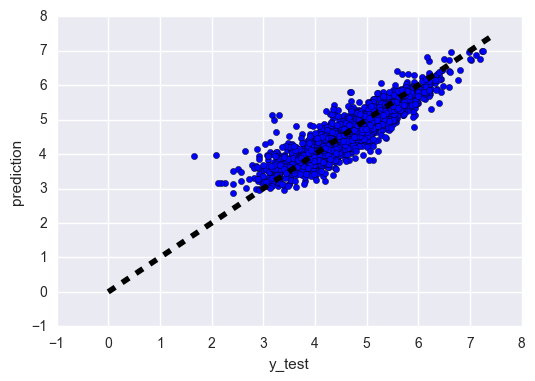

In [120]:
fig, ax = plt.subplots()
ax.scatter(y_test, prediction)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('y_test')
ax.set_ylabel('prediction')
plt.show()

Prediction: DescribeResult(nobs=1861L, minmax=(2.8786742546317976, 6.9931387844375141), mean=4.6268506830538438, variance=0.51799302141928061, skewness=0.2124372664320474, kurtosis=-0.2020041300820994)
y_test: DescribeResult(nobs=1861L, minmax=(1.6627578316815741, 7.2612422363398883), mean=4.6361100710652536, variance=0.63725962483429255, skewness=-0.019595124169749786, kurtosis=0.058401921786591426)


0.79269931546685979

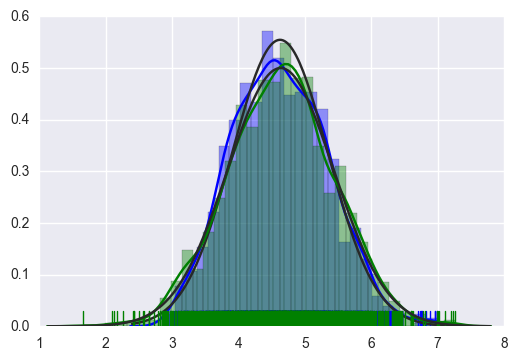

In [121]:
from scipy.stats import norm, normaltest, describe
sns.distplot(prediction, fit=norm, rug=True, color='b');
sns.distplot(y_test, fit=norm, rug=True, color='g');
print "Prediction:", describe(prediction)
stat, p = normaltest(prediction)
p

print "y_test:", describe(y_test)
stat, p = normaltest(y_test)
p

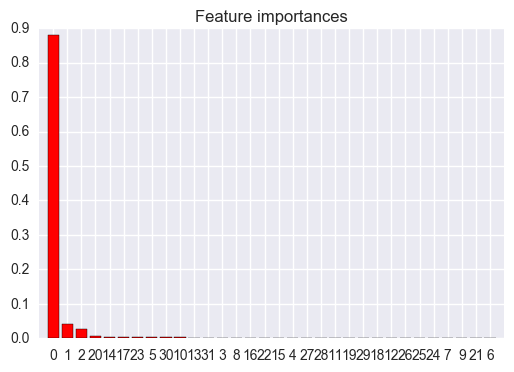

In [122]:
importances = rfbestmodel.feature_importances_
std = np.std([rfbestmodel.feature_importances_ for tree in rfbestmodel.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [123]:
features = dummy_df.drop(['TOTCIR'], axis=1).columns
feature_importances = rfbestmodel.feature_importances_

features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

features_df.head()

,Features,Importance Score
0,POPU_LSA,0.880085
1,STINCOME,0.041450
2,STGVT,0.026879
20,OBEREG_9,0.005608
14,OBEREG_3,0.005143
